<a href="https://colab.research.google.com/github/jpantojaj/Backtesting_Stresstesting/blob/main/Sesi%C3%B3n_7_Modelos_RM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from copy import copy
from scipy import stats
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

In [4]:
# Cargar el archivo stock.csv, el cual tiene las series de las siguiente acciones.
# AAPL = Apple
# BA = Boeing
# T = AT&T
# MGM = MGM Resorts International (Hotel Industry)
# AMZN = Amazon
# IBM = IBM
# TSLA = Tesla Motors
# GOOG = Google
# sp500 = US Stock Market (S&P 500 is un indice que mide el performance de las 500 empresas más importantes en el mercado de valores de EEUU)

stocks_df = pd.read_csv('stock.csv')
stocks_df

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.130000,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.350000,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.250000,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.730000,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.800000,194.449997,180.520004,26.760000,318.590851,1314.500000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,440.250000,174.279999,29.850000,16.719999,3205.030029,125.449997,1485.020020,1473.609985,3327.770020
2155,2020-08-06,455.609985,172.199997,29.840000,18.459999,3225.000000,126.120003,1489.579956,1500.099976,3349.159912
2156,2020-08-07,444.450012,170.020004,30.020000,19.030001,3167.459961,124.959999,1452.709961,1494.489990,3351.280029
2157,2020-08-10,450.910004,179.410004,30.200001,21.650000,3148.159912,127.110001,1418.569946,1496.099976,3360.469971


In [5]:
stocks_df = stocks_df.sort_values(by = ['Date'])
stocks_df

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.130000,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.350000,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.250000,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.730000,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.800000,194.449997,180.520004,26.760000,318.590851,1314.500000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,440.250000,174.279999,29.850000,16.719999,3205.030029,125.449997,1485.020020,1473.609985,3327.770020
2155,2020-08-06,455.609985,172.199997,29.840000,18.459999,3225.000000,126.120003,1489.579956,1500.099976,3349.159912
2156,2020-08-07,444.450012,170.020004,30.020000,19.030001,3167.459961,124.959999,1452.709961,1494.489990,3351.280029
2157,2020-08-10,450.910004,179.410004,30.200001,21.650000,3148.159912,127.110001,1418.569946,1496.099976,3360.469971


In [6]:
stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2159 entries, 0 to 2158
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2159 non-null   object 
 1   AAPL    2159 non-null   float64
 2   BA      2159 non-null   float64
 3   T       2159 non-null   float64
 4   MGM     2159 non-null   float64
 5   AMZN    2159 non-null   float64
 6   IBM     2159 non-null   float64
 7   TSLA    2159 non-null   float64
 8   GOOG    2159 non-null   float64
 9   sp500   2159 non-null   float64
dtypes: float64(9), object(1)
memory usage: 168.8+ KB


In [7]:
stocks_df['Date'] = pd.to_datetime(stocks_df['Date'])
stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2159 entries, 0 to 2158
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2159 non-null   datetime64[ns]
 1   AAPL    2159 non-null   float64       
 2   BA      2159 non-null   float64       
 3   T       2159 non-null   float64       
 4   MGM     2159 non-null   float64       
 5   AMZN    2159 non-null   float64       
 6   IBM     2159 non-null   float64       
 7   TSLA    2159 non-null   float64       
 8   GOOG    2159 non-null   float64       
 9   sp500   2159 non-null   float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 168.8 KB


In [8]:
stocks_df

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.130000,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.350000,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.250000,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.730000,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.800000,194.449997,180.520004,26.760000,318.590851,1314.500000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,440.250000,174.279999,29.850000,16.719999,3205.030029,125.449997,1485.020020,1473.609985,3327.770020
2155,2020-08-06,455.609985,172.199997,29.840000,18.459999,3225.000000,126.120003,1489.579956,1500.099976,3349.159912
2156,2020-08-07,444.450012,170.020004,30.020000,19.030001,3167.459961,124.959999,1452.709961,1494.489990,3351.280029
2157,2020-08-10,450.910004,179.410004,30.200001,21.650000,3148.159912,127.110001,1418.569946,1496.099976,3360.469971


In [9]:
stocks_df.set_index('Date', inplace=True)

In [10]:
stocks_df

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
Date,,,,,,,,,
2012-01-12,60.198570,75.510002,30.120001,12.130000,175.929993,180.550003,28.250000,313.644379,1295.500000
2012-01-13,59.972858,74.599998,30.070000,12.350000,178.419998,179.160004,22.790001,311.328064,1289.089966
2012-01-17,60.671429,75.239998,30.250000,12.250000,181.660004,180.000000,26.600000,313.116364,1293.670044
2012-01-18,61.301430,75.059998,30.330000,12.730000,189.440002,181.070007,26.809999,315.273285,1308.040039
2012-01-19,61.107143,75.559998,30.420000,12.800000,194.449997,180.520004,26.760000,318.590851,1314.500000
...,...,...,...,...,...,...,...,...,...
2020-08-05,440.250000,174.279999,29.850000,16.719999,3205.030029,125.449997,1485.020020,1473.609985,3327.770020
2020-08-06,455.609985,172.199997,29.840000,18.459999,3225.000000,126.120003,1489.579956,1500.099976,3349.159912
2020-08-07,444.450012,170.020004,30.020000,19.030001,3167.459961,124.959999,1452.709961,1494.489990,3351.280029


In [11]:
stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2159 entries, 2012-01-12 to 2020-08-11
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2159 non-null   float64
 1   BA      2159 non-null   float64
 2   T       2159 non-null   float64
 3   MGM     2159 non-null   float64
 4   AMZN    2159 non-null   float64
 5   IBM     2159 non-null   float64
 6   TSLA    2159 non-null   float64
 7   GOOG    2159 non-null   float64
 8   sp500   2159 non-null   float64
dtypes: float64(9)
memory usage: 168.7 KB


# Exploramos y Visualizamos la Data

In [12]:
stocks_df.isnull().sum()

AAPL     0
BA       0
T        0
MGM      0
AMZN     0
IBM      0
TSLA     0
GOOG     0
sp500    0
dtype: int64

In [15]:
stocks_df.describe().T

,count,mean,std,min,25%,50%,75%,max
AAPL,2159.0,140.819823,70.827601,55.790001,89.165714,116.599998,175.019997,455.609985
BA,2159.0,189.942700,103.678586,67.239998,124.015000,142.419998,297.044998,440.619995
T,2159.0,35.162899,3.207490,26.770000,33.040001,34.930000,37.419998,43.470001
MGM,2159.0,23.105743,6.963847,7.140000,18.545000,23.780001,28.430000,38.029999
AMZN,2159.0,915.665665,697.838905,175.929993,316.490005,676.010010,1593.645019,3225.000000
IBM,2159.0,161.853001,25.561938,94.769997,142.769997,156.949997,185.974998,215.800003
TSLA,2159.0,259.600815,210.988003,22.790001,184.595001,231.960007,307.350006,1643.000000
GOOG,2159.0,783.712512,334.448057,278.481171,527.214416,737.599976,1079.744995,1568.489990
sp500,2159.0,2218.749554,537.321727,1278.040039,1847.984985,2106.629883,2705.810059,3386.149902


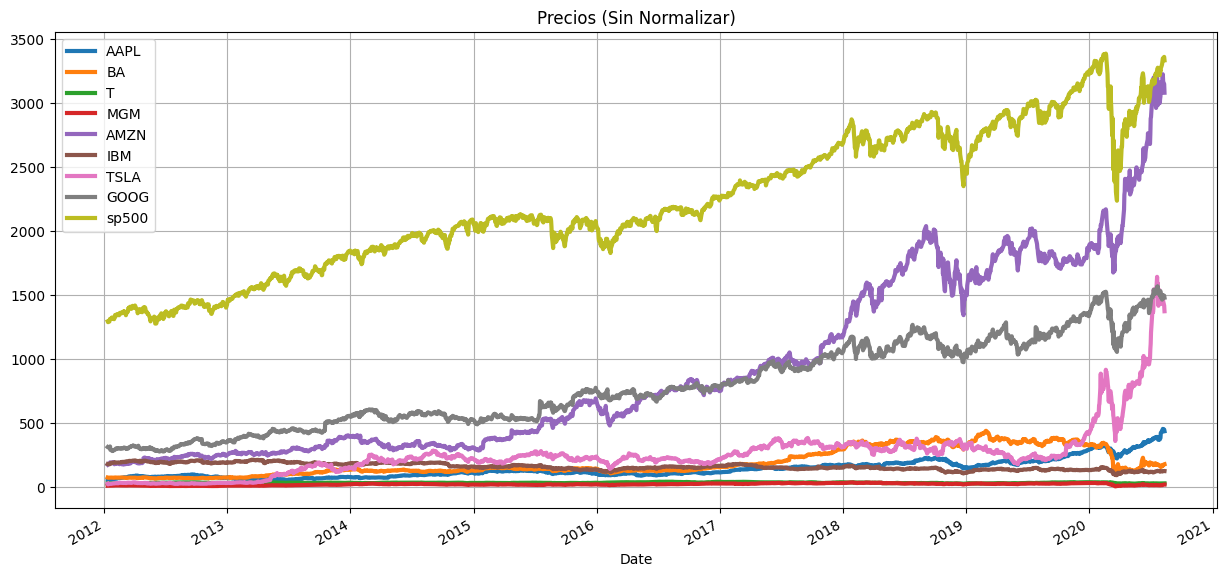

In [16]:
stocks_df.plot(figsize = (15,7), linewidth = 3, title = 'Precios (Sin Normalizar)')
plt.grid()
plt.show()

In [17]:
def normalize(df):
  x = df.copy()
  for i in x.columns[0:]:
    x[i] = x[i]/x[i][0]
  return x

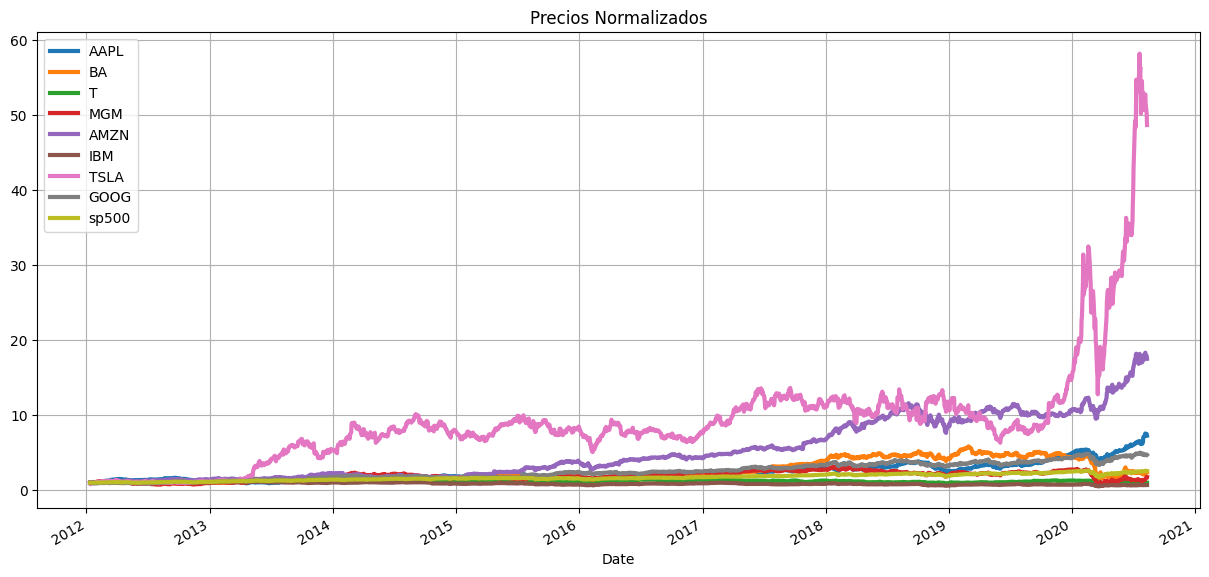

In [18]:
normalize(stocks_df).plot(figsize = (15,7), linewidth = 3, title = 'Precios Normalizados')
plt.grid()
plt.show()

In [19]:
stocks_daily_return = stocks_df.copy().pct_change()*100
for i in stocks_daily_return.columns[0:]:
     stocks_daily_return[i][0] = 0
stocks_daily_return

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
Date,,,,,,,,,
2012-01-12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2012-01-13,-0.374946,-1.205144,-0.166006,1.813685,1.415339,-0.769869,-19.327430,-0.738516,-0.494792
2012-01-17,1.164812,0.857909,0.598603,-0.809717,1.815943,0.468852,16.717854,0.574410,0.355295
2012-01-18,1.038382,-0.239234,0.264463,3.918367,4.282725,0.594448,0.789470,0.688856,1.110793
2012-01-19,-0.316937,0.666134,0.296736,0.549882,2.644634,-0.303752,-0.186494,1.052283,0.493866
...,...,...,...,...,...,...,...,...,...
2020-08-05,0.362467,5.579446,-0.533156,0.000000,2.109065,-0.309917,-0.133153,0.589774,0.642974
2020-08-06,3.488923,-1.193483,-0.033501,10.406699,0.623082,0.534082,0.307062,1.797626,0.642770
2020-08-07,-2.449458,-1.265966,0.603217,3.087768,-1.784187,-0.919762,-2.475194,-0.373974,0.063303


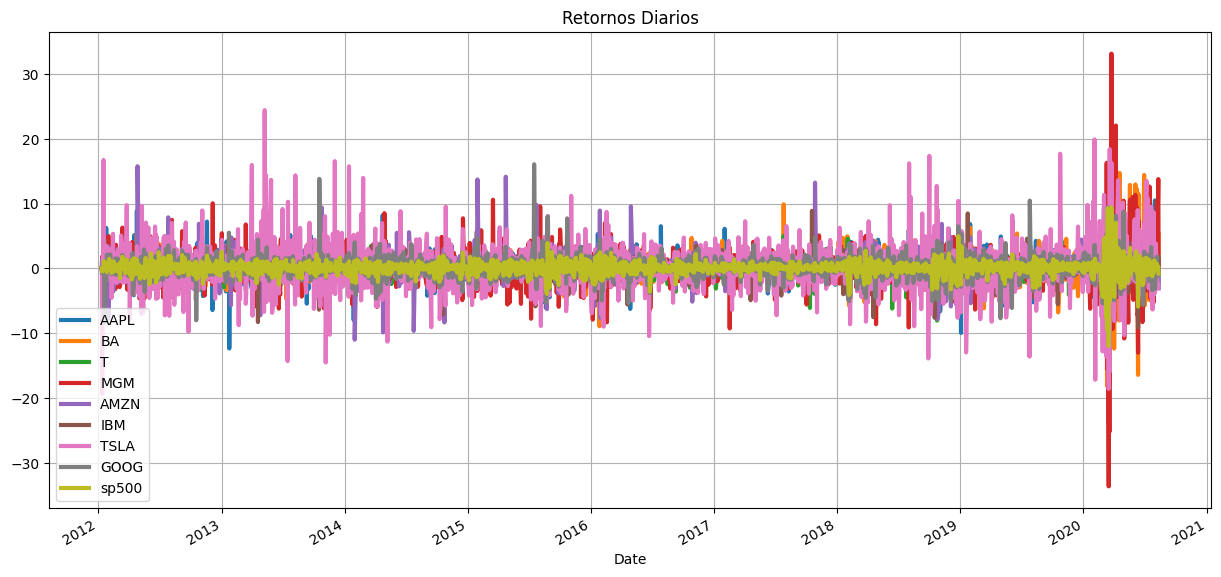

In [20]:
stocks_daily_return.plot(figsize = (15,7), linewidth = 3, title = 'Retornos Diarios')
plt.grid()
plt.show()

In [21]:
px.line(stocks_daily_return, title='Retornos Diarios')

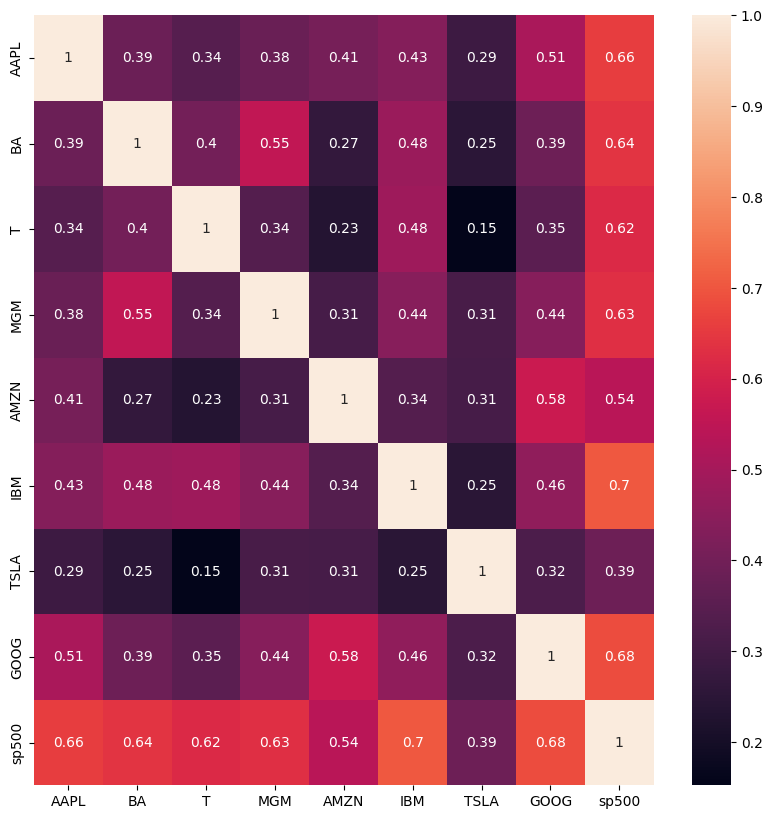

In [22]:
cm = stocks_daily_return.corr()
plt.figure(figsize=(10, 10))
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax);

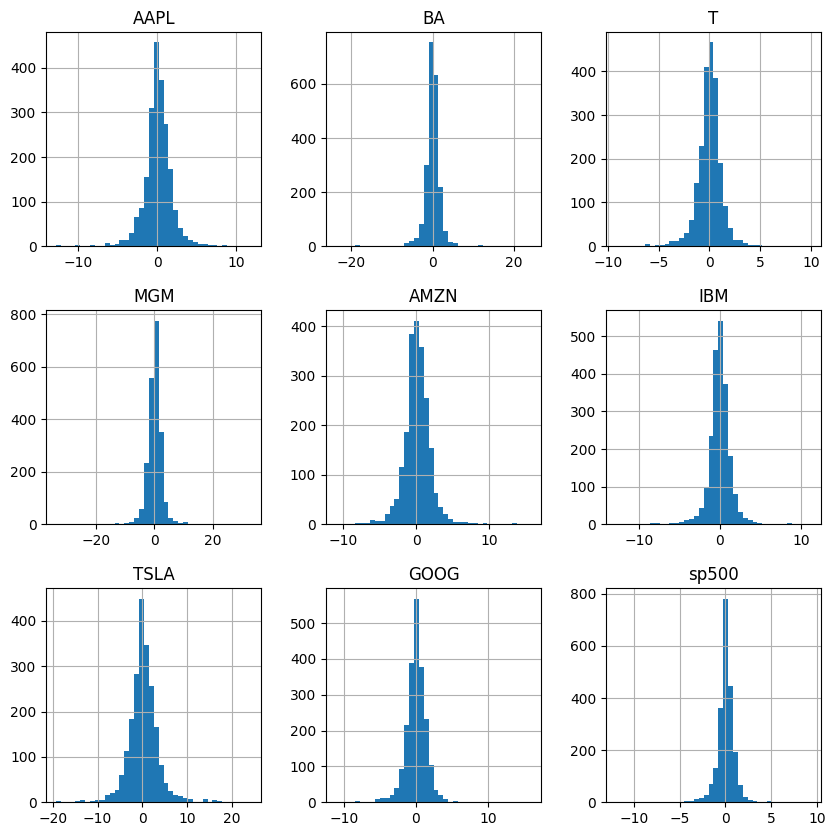

In [23]:
stocks_daily_return.hist(figsize=(10, 10), bins = 40);

In [25]:
stocks_daily_return.describe().T

,count,mean,std,min,25%,50%,75%,max
AAPL,2159.0,0.107695,1.775768,-12.864695,-0.692402,0.081097,1.001854,11.980826
BA,2159.0,0.065907,2.259817,-23.848412,-0.784088,0.077990,0.946515,24.318606
T,2159.0,0.008159,1.264852,-9.241020,-0.549592,0.059506,0.632362,10.022346
MGM,2159.0,0.064662,2.746590,-33.613990,-1.109729,0.108348,1.276038,33.114754
AMZN,2159.0,0.151122,1.927817,-10.997247,-0.758938,0.116286,1.103391,15.745701
IBM,2159.0,-0.006091,1.430991,-12.850727,-0.626272,0.021314,0.659980,11.301051
TSLA,2159.0,0.238398,3.430026,-19.327430,-1.395229,0.116436,1.799542,24.395054
GOOG,2159.0,0.084392,1.585558,-11.100820,-0.613768,0.060309,0.860845,16.052431
sp500,2159.0,0.049316,1.048843,-11.984055,-0.318606,0.059362,0.501914,9.382774


In [26]:
df_hist = stocks_daily_return.copy()
data = []
for i in df_hist.columns:
  data.append(df_hist[i].values)
data

[array([ 0.        , -0.37494578,  1.16481192, ..., -2.44945751,
         1.45347999, -2.9739868 ]),
 array([ 0.        , -1.20514366,  0.85790887, ..., -1.26596576,
         5.52287953,  0.40131597]),
 array([ 0.        , -0.16600597,  0.59860326, ...,  0.60321716,
         0.5996036 ,  0.        ]),
 array([ 0.        ,  1.81368508, -0.8097166 , ...,  3.08776831,
        13.76772918, -0.69284065]),
 array([ 0.        ,  1.41533854,  1.8159433 , ..., -1.78418726,
        -0.60932259, -2.14379167]),
 array([ 0.        , -0.76986928,  0.46885241, ..., -0.91976211,
         1.72055219, -0.28322004]),
 array([  0.        , -19.32743009,  16.71785359, ...,  -2.47519409,
         -2.35009162,  -3.1143992 ]),
 array([ 0.        , -0.73851634,  0.57441015, ..., -0.37397414,
         0.10772812, -1.05474435]),
 array([ 0.        , -0.49479228,  0.35529545, ...,  0.06330295,
         0.27422185, -0.79691324])]

In [27]:
ff.create_distplot(data,df_hist.columns)

# Y que pasaría si decidimos invertir en varias acciones?

In [28]:
#generemos un mix aleatorio
np.random.seed()
weights = np.array(np.random.random(9))
weights = weights / np.sum(weights)
print(weights)
print(np.sum(weights))

[0.13651813 0.09008913 0.08753753 0.16314256 0.14588675 0.14274685
 0.04361251 0.16070898 0.02975755]
1.0000000000000002


In [29]:
df_portfolio = normalize(stocks_df)
df_portfolio

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
Date,,,,,,,,,
2012-01-12,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2012-01-13,0.996251,0.987949,0.998340,1.018137,1.014153,0.992301,0.806726,0.992615,0.995052
2012-01-17,1.007855,0.996424,1.004316,1.009893,1.032570,0.996954,0.941593,0.998317,0.998587
2012-01-18,1.018320,0.994040,1.006972,1.049464,1.076792,1.002880,0.949027,1.005193,1.009680
2012-01-19,1.015093,1.000662,1.009960,1.055235,1.105269,0.999834,0.947257,1.015771,1.014666
...,...,...,...,...,...,...,...,...,...
2020-08-05,7.313297,2.308039,0.991036,1.378401,18.217644,0.694821,52.567080,4.698347,2.568715
2020-08-06,7.568452,2.280493,0.990704,1.521847,18.331155,0.698532,52.728494,4.782805,2.585226
2020-08-07,7.383066,2.251622,0.996680,1.568838,18.004093,0.692107,51.423361,4.764919,2.586862


In [30]:
#Imaginemos que deseamos invertir 1,000,000 de USD
for a, stock in enumerate(df_portfolio.columns):
  df_portfolio[stock] = df_portfolio[stock] * weights[a]
  df_portfolio[stock] = df_portfolio[stock] * 1000000
df_portfolio

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
Date,,,,,,,,,
2012-01-12,1.365181e+05,90089.128896,87537.529841,163142.558516,1.458868e+05,142746.853361,4.361251e+04,160708.984739,29757.552690
2012-01-13,1.360063e+05,89003.425473,87392.212315,166101.450756,1.479515e+05,141647.889195,3.518333e+04,159522.122621,29610.314616
2012-01-17,1.375905e+05,89766.993754,87915.344946,164756.499738,1.506383e+05,142312.008740,4.106523e+04,160438.433885,29715.518717
2012-01-18,1.390192e+05,89552.240175,88147.848338,171212.264625,1.570897e+05,143157.980104,4.138943e+04,161543.623734,30045.596589
2012-01-19,1.385786e+05,90148.777895,88409.414653,172153.730338,1.612441e+05,142723.135484,4.131224e+04,163243.519219,30193.981483
...,...,...,...,...,...,...,...,...,...
2020-08-05,9.983976e+05,207929.186571,86752.827988,224875.796805,2.657713e+06,99183.561497,2.292582e+06,755066.503487,76438.665928
2020-08-06,1.033231e+06,205447.587269,86723.765064,248277.944523,2.674273e+06,99713.283163,2.299622e+06,768639.772592,76929.990389
2020-08-07,1.007922e+06,202846.691160,87246.897695,255944.192226,2.626559e+06,98796.158166,2.242702e+06,765765.258605,76978.689341


In [31]:
df_portfolio['ValorTotal'] = df_portfolio.sum(axis = 1)
df_portfolio

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500,ValorTotal
Date,,,,,,,,,,
2012-01-12,1.365181e+05,90089.128896,87537.529841,163142.558516,1.458868e+05,142746.853361,4.361251e+04,160708.984739,29757.552690,1.000000e+06
2012-01-13,1.360063e+05,89003.425473,87392.212315,166101.450756,1.479515e+05,141647.889195,3.518333e+04,159522.122621,29610.314616,9.924186e+05
2012-01-17,1.375905e+05,89766.993754,87915.344946,164756.499738,1.506383e+05,142312.008740,4.106523e+04,160438.433885,29715.518717,1.004199e+06
2012-01-18,1.390192e+05,89552.240175,88147.848338,171212.264625,1.570897e+05,143157.980104,4.138943e+04,161543.623734,30045.596589,1.021158e+06
2012-01-19,1.385786e+05,90148.777895,88409.414653,172153.730338,1.612441e+05,142723.135484,4.131224e+04,163243.519219,30193.981483,1.028008e+06
...,...,...,...,...,...,...,...,...,...,...
2020-08-05,9.983976e+05,207929.186571,86752.827988,224875.796805,2.657713e+06,99183.561497,2.292582e+06,755066.503487,76438.665928,7.398939e+06
2020-08-06,1.033231e+06,205447.587269,86723.765064,248277.944523,2.674273e+06,99713.283163,2.299622e+06,768639.772592,76929.990389,7.492858e+06
2020-08-07,1.007922e+06,202846.691160,87246.897695,255944.192226,2.626559e+06,98796.158166,2.242702e+06,765765.258605,76978.689341,7.364761e+06


In [32]:
df_portfolio['RetornoDiarioTotal'] = df_portfolio.ValorTotal.pct_change()*100
df_portfolio['RetornoDiarioTotal'][0] = 0
df_portfolio

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500,ValorTotal,RetornoDiarioTotal
Date,,,,,,,,,,,
2012-01-12,1.365181e+05,90089.128896,87537.529841,163142.558516,1.458868e+05,142746.853361,4.361251e+04,160708.984739,29757.552690,1.000000e+06,0.000000
2012-01-13,1.360063e+05,89003.425473,87392.212315,166101.450756,1.479515e+05,141647.889195,3.518333e+04,159522.122621,29610.314616,9.924186e+05,-0.758145
2012-01-17,1.375905e+05,89766.993754,87915.344946,164756.499738,1.506383e+05,142312.008740,4.106523e+04,160438.433885,29715.518717,1.004199e+06,1.187021
2012-01-18,1.390192e+05,89552.240175,88147.848338,171212.264625,1.570897e+05,143157.980104,4.138943e+04,161543.623734,30045.596589,1.021158e+06,1.688818
2012-01-19,1.385786e+05,90148.777895,88409.414653,172153.730338,1.612441e+05,142723.135484,4.131224e+04,163243.519219,30193.981483,1.028008e+06,0.670774
...,...,...,...,...,...,...,...,...,...,...,...
2020-08-05,9.983976e+05,207929.186571,86752.827988,224875.796805,2.657713e+06,99183.561497,2.292582e+06,755066.503487,76438.665928,7.398939e+06,0.963032
2020-08-06,1.033231e+06,205447.587269,86723.765064,248277.944523,2.674273e+06,99713.283163,2.299622e+06,768639.772592,76929.990389,7.492858e+06,1.269351
2020-08-07,1.007922e+06,202846.691160,87246.897695,255944.192226,2.626559e+06,98796.158166,2.242702e+06,765765.258605,76978.689341,7.364761e+06,-1.709590


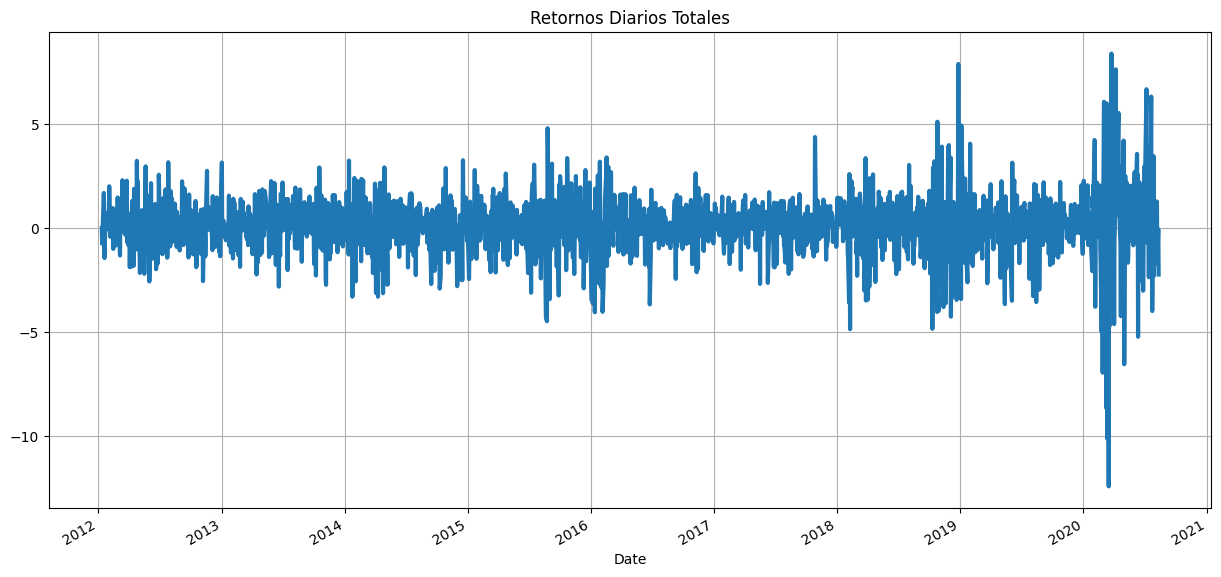

In [33]:
df_portfolio.RetornoDiarioTotal.plot(figsize = (15,7), linewidth = 3, title = 'Retornos Diarios Totales')
plt.grid()
plt.show()

In [34]:
px.line(df_portfolio.RetornoDiarioTotal, title='Retornos Diarios Totales')

In [35]:
px.histogram(df_portfolio.RetornoDiarioTotal)

In [36]:
print(df_portfolio.RetornoDiarioTotal.mean())
print(df_portfolio.RetornoDiarioTotal.std())

0.10145573099592739
1.4115675234995633


In [37]:
# Calculemos el retorno acumulado
cummulative_return = ((df_portfolio['ValorTotal'][-1:] - df_portfolio['ValorTotal'][0])/ df_portfolio['ValorTotal'][0]) * 100
print('Retorno Acumulado del Portafolio {} %'.format(cummulative_return.values[0]))

Retorno Acumulado del Portafolio 619.5675588611033 %


In [38]:
# Calculemos el Sharpe Ratio
sharpe_ratio = df_portfolio['RetornoDiarioTotal'].mean()/df_portfolio['RetornoDiarioTotal'].std() * np.sqrt(252)
print('Sharpe Ratio {}'.format(sharpe_ratio))

Sharpe Ratio 1.1409725521256273


# Cuál es la relación entre el retorno de mi portafolio, el de mercado y un bono o alternativa sin riesgo?

In [39]:
#Calculemos la relación para una acción
stocks_daily_return['AAPL']

Date
2012-01-12    0.000000
2012-01-13   -0.374946
2012-01-17    1.164812
2012-01-18    1.038382
2012-01-19   -0.316937
                ...   
2020-08-05    0.362467
2020-08-06    3.488923
2020-08-07   -2.449458
2020-08-10    1.453480
2020-08-11   -2.973987
Name: AAPL, Length: 2159, dtype: float64

In [40]:
stocks_daily_return['sp500']

Date
2012-01-12    0.000000
2012-01-13   -0.494792
2012-01-17    0.355295
2012-01-18    1.110793
2012-01-19    0.493866
                ...   
2020-08-05    0.642974
2020-08-06    0.642770
2020-08-07    0.063303
2020-08-10    0.274222
2020-08-11   -0.796913
Name: sp500, Length: 2159, dtype: float64

<Axes: xlabel='sp500', ylabel='AAPL'>

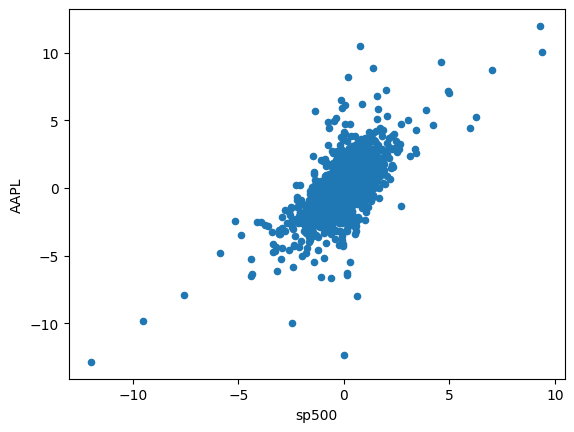

In [41]:
stocks_daily_return.plot(kind = 'scatter', x = 'sp500', y = 'AAPL')

In [42]:
beta, alpha = np.polyfit(stocks_daily_return['sp500'], stocks_daily_return['AAPL'], 1)
print('Beta para {} stock es = {} y el alpha es = {}'.format('AAPL', beta, alpha))

Beta para AAPL stock es = 1.1128924148678097 y el alpha es = 0.05281208469440288


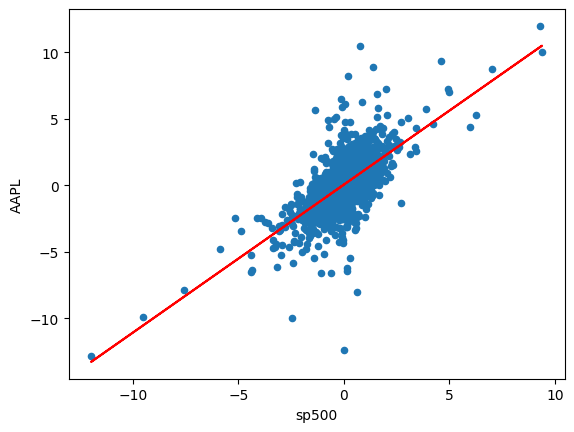

In [43]:
stocks_daily_return.plot(kind = 'scatter', x = 'sp500', y = 'AAPL')
plt.plot(stocks_daily_return['sp500'], beta * stocks_daily_return['sp500'] + alpha, '-', color = 'r')

In [44]:
beta

1.1128924148678097

In [45]:
stocks_daily_return['sp500'].mean()

0.04931600660038915

In [46]:
rm = stocks_daily_return['sp500'].mean() * 252
rm

12.427633663298066

In [47]:
rf = 0
ER_AAPL = rf + ( beta * (rm-rf) )
ER_AAPL

13.830619238640267

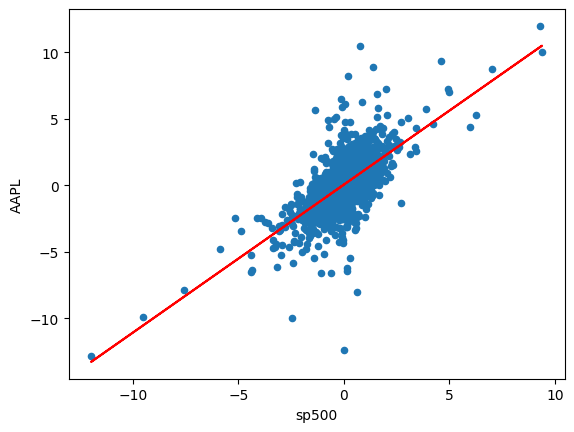

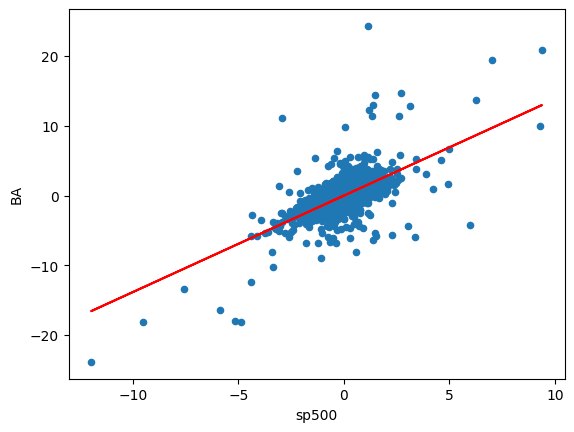

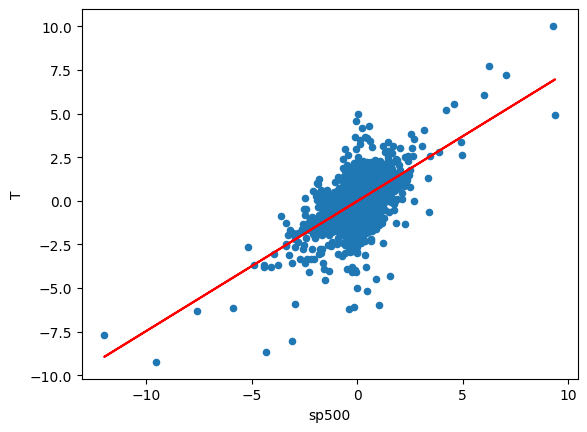

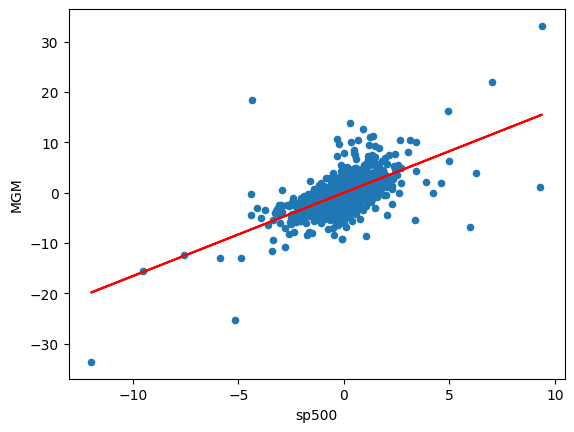

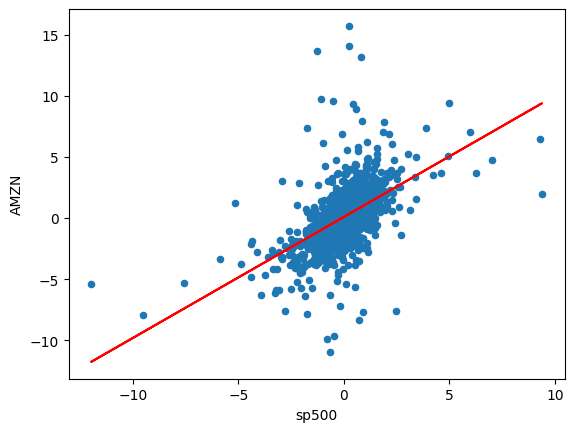

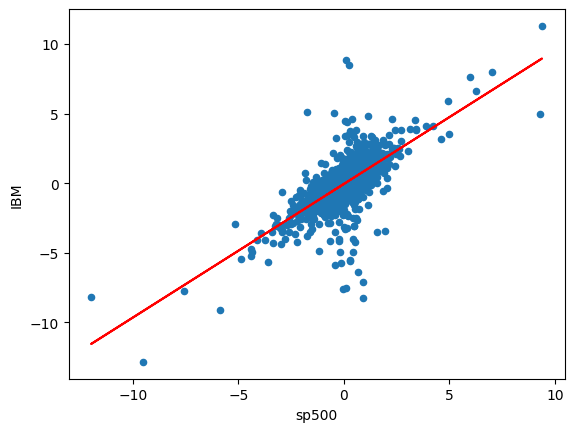

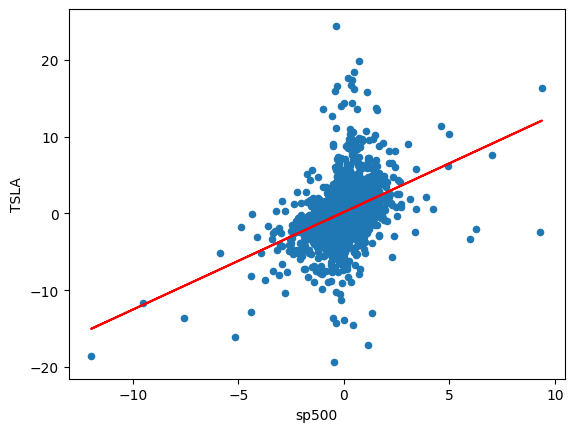

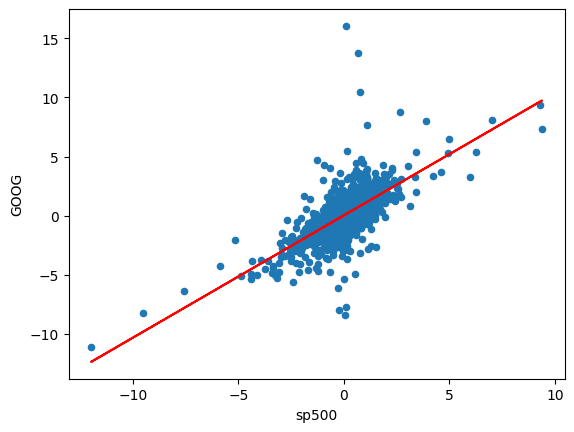

In [48]:
#Calculemos para todo el portafolio
beta = {}
alpha = {}

for i in stocks_daily_return.columns:
    if i != 'sp500':
        stocks_daily_return.plot(kind = 'scatter', x = 'sp500', y = i)
        b, a = np.polyfit(stocks_daily_return['sp500'], stocks_daily_return[i], 1)
        plt.plot(stocks_daily_return['sp500'], b * stocks_daily_return['sp500'] + a, '-', color = 'r')
        beta[i] = b
        alpha[i] = a
        plt.show()

In [49]:
beta

{'AAPL': 1.1128924148678097,
 'BA': 1.3828672010892786,
 'T': 0.7446293454747845,
 'MGM': 1.6535677065180114,
 'AMZN': 0.9917345712576845,
 'IBM': 0.960414914809525,
 'TSLA': 1.2686150101095908,
 'GOOG': 1.0348817687428562}

In [50]:
alpha

{'AAPL': 0.05281208469440288,
 'BA': -0.002290698329752977,
 'T': -0.028563430198461512,
 'MGM': -0.016885305520478545,
 'AMZN': 0.10221396417765283,
 'IBM': -0.05345494150445112,
 'TSLA': 0.17583492165165843,
 'GOOG': 0.03335558721467021}

In [51]:
keys = list(beta.keys())
keys

['AAPL', 'BA', 'T', 'MGM', 'AMZN', 'IBM', 'TSLA', 'GOOG']

In [52]:
ER = {}
rf = 0
rm = stocks_daily_return['sp500'].mean() * 252 # this is the expected return of the market
rm

12.427633663298066

In [53]:
for i in keys:
    ER[i] = rf + ( beta[i] * (rm-rf) )

In [54]:
for i in keys:
    print('Retorno Esperado basado en CAPM {} es {}%'.format(i, ER[i]))

Retorno Esperado basado en CAPM AAPL es 13.830619238640267%
Retorno Esperado basado en CAPM BA es 17.185766980127894%
Retorno Esperado basado en CAPM T es 9.253980720502037%
Retorno Esperado basado en CAPM MGM es 20.549933694065814%
Retorno Esperado basado en CAPM AMZN es 12.324913942818474%
Retorno Esperado basado en CAPM IBM es 11.935684726020396%
Retorno Esperado basado en CAPM TSLA es 15.765882605403165%
Retorno Esperado basado en CAPM GOOG es 12.861131506762163%


In [55]:
#Calculemos el retorno esperado del portafolio
portfolio_weights = 1/8 * np.ones(8)
portfolio_weights

array([0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125])

In [56]:
ER_portfolio = sum(list(ER.values()) * portfolio_weights)
print('El Retorno esperado del Portafolio basado en CAPM es {}%\n'.format(ER_portfolio))

El Retorno esperado del Portafolio basado en CAPM es 14.213489176792526%



# Y como podemos encontrar la combinación óptima de pesos para cada componente de mi portafolio?

In [57]:
df_portfolio

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500,ValorTotal,RetornoDiarioTotal
Date,,,,,,,,,,,
2012-01-12,1.365181e+05,90089.128896,87537.529841,163142.558516,1.458868e+05,142746.853361,4.361251e+04,160708.984739,29757.552690,1.000000e+06,0.000000
2012-01-13,1.360063e+05,89003.425473,87392.212315,166101.450756,1.479515e+05,141647.889195,3.518333e+04,159522.122621,29610.314616,9.924186e+05,-0.758145
2012-01-17,1.375905e+05,89766.993754,87915.344946,164756.499738,1.506383e+05,142312.008740,4.106523e+04,160438.433885,29715.518717,1.004199e+06,1.187021
2012-01-18,1.390192e+05,89552.240175,88147.848338,171212.264625,1.570897e+05,143157.980104,4.138943e+04,161543.623734,30045.596589,1.021158e+06,1.688818
2012-01-19,1.385786e+05,90148.777895,88409.414653,172153.730338,1.612441e+05,142723.135484,4.131224e+04,163243.519219,30193.981483,1.028008e+06,0.670774
...,...,...,...,...,...,...,...,...,...,...,...
2020-08-05,9.983976e+05,207929.186571,86752.827988,224875.796805,2.657713e+06,99183.561497,2.292582e+06,755066.503487,76438.665928,7.398939e+06,0.963032
2020-08-06,1.033231e+06,205447.587269,86723.765064,248277.944523,2.674273e+06,99713.283163,2.299622e+06,768639.772592,76929.990389,7.492858e+06,1.269351
2020-08-07,1.007922e+06,202846.691160,87246.897695,255944.192226,2.626559e+06,98796.158166,2.242702e+06,765765.258605,76978.689341,7.364761e+06,-1.709590


In [58]:
#Primero cremos una función que me permita insumir pesos y el dataframe para devolverlo con los valores de retorno y valor
def portfolio_allocation(df, weights):
    df_portfolio = df.drop(columns = ['sp500']).copy()
    df_portfolio = normalize(df_portfolio)

    for a, stock in enumerate(df_portfolio.columns):
        df_portfolio[stock] = df_portfolio[stock] * weights[a]
        df_portfolio[stock] = df_portfolio[stock] * 1000000

    df_portfolio['ValorTotal'] = df_portfolio.sum(axis = 1)
    df_portfolio['RetornoDiarioTotal'] = 0.0000

    for i in range(1, len(stocks_df)):
        df_portfolio['RetornoDiarioTotal'][i] = ( (df_portfolio['ValorTotal'][i] - df_portfolio['ValorTotal'][i-1]) / df_portfolio['ValorTotal'][i-1]) * 100
        df_portfolio['RetornoDiarioTotal'][0] = 0
    return df_portfolio

In [59]:
#Luego definimos un set de métricas en una función y calculamos todos los estadísticos
def portfolio_statistical_analysis(weights):
    df_portfolio = portfolio_allocation(stocks_df, weights)
    cummulative_return = ((df_portfolio['ValorTotal'][-1:] - df_portfolio['ValorTotal'][0])/ df_portfolio['ValorTotal'][0]) * 100
    df_portfolio_daily_return = df_portfolio.drop(columns = ['ValorTotal', 'RetornoDiarioTotal'])
    df_portfolio_daily_return = df_portfolio_daily_return.pct_change()
    expected_portfolio_return = np.sum(df_portfolio_daily_return.mean() * weights * 252)
    covariance = df_portfolio_daily_return.cov()* 252
    expected_volatility = np.sqrt(np.dot(weights.T, np.dot(covariance, weights)))
    sharpe_ratio = expected_portfolio_return/expected_volatility
    return cummulative_return.values[0], expected_portfolio_return, expected_volatility, sharpe_ratio

In [60]:
number_of_trials = 10
possible_weights_runs = np.zeros((number_of_trials, 8))
sharpe_ratio_runs = np.zeros(number_of_trials)
expected_portfolio_returns_runs = np.zeros(number_of_trials)
volatility_runs = np.zeros(number_of_trials)
cummulative_returns_runs = np.zeros(number_of_trials)

for i in range(number_of_trials):
    # Pesos Aleatorios
    weights = np.array(np.random.random(8))
    weights = weights / np.sum(weights)

    # Seteo los pesos
    possible_weights_runs[i,:] = weights

    # Sharpe Ratio, Retorno y Volatilidad
    cummulative_returns_runs[i], expected_portfolio_returns_runs[i], volatility_runs[i], sharpe_ratio_runs[i]  = portfolio_statistical_analysis(weights)

In [61]:
print(sharpe_ratio_runs.shape)
print(sharpe_ratio_runs)

(10,)
[0.93687614 0.85360583 1.08926004 1.06701719 0.99450469 1.19060185
 1.11366706 0.87419248 0.96777478 1.05555681]


In [62]:
expected_portfolio_returns_runs

array([0.22833962, 0.1962298 , 0.25308687, 0.24357053, 0.21117104,
       0.25143099, 0.26233907, 0.20891314, 0.20399558, 0.21927493])

In [63]:
cummulative_returns_runs

array([ 985.95095726,  668.41376097, 1063.07939287, 1155.353217  ,
        629.2364267 ,  821.41990136, 1569.36265527,  594.4279075 ,
        906.30755898,  971.39405695])

In [64]:
df_optimize = pd.DataFrame({'Volatility': volatility_runs.tolist(), 'Portfolio_Return': expected_portfolio_returns_runs.tolist(), 'Sharpe_Ratio': sharpe_ratio_runs.tolist() })
df_optimize

,Volatility,Portfolio_Return,Sharpe_Ratio
0,0.243724,0.228340,0.936876
1,0.229883,0.196230,0.853606
2,0.232348,0.253087,1.089260
3,0.228272,0.243571,1.067017
4,0.212338,0.211171,0.994505
5,0.211180,0.251431,1.190602
6,0.235563,0.262339,1.113667
7,0.238978,0.208913,0.874192
8,0.210788,0.203996,0.967775
9,0.207734,0.219275,1.055557


In [65]:
from scipy.optimize import minimize

def calculate_negative_sharpe_func(weights):
    cum_return, exp_portfolio_return, volatility, sharpe_ratio = portfolio_statistical_analysis(weights)
    return sharpe_ratio * -1

def optimization_constraints_func(weights):
    return np.sum(weights) - 1

def calculate_volatility_func(weights):
    cum_return, exp_portfolio_return, volatility, sharpe_ratio = portfolio_statistical_analysis(weights)
    return volatility

def calculate_return_func(weights):
    cum_return, exp_portfolio_return, volatility, sharpe_ratio = portfolio_statistical_analysis(weights)
    return exp_portfolio_return

In [66]:
optimization_constraint = ({'type':'eq','fun': optimization_constraints_func})

bounds = ((0, 1), (0, 1), (0, 1), (0, 1),(0, 1), (0, 1), (0, 1), (0, 1))

initialization = [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125]

In [67]:
##Sequential Least Squares Programming (SLSQP)
optimization_results = minimize(calculate_negative_sharpe_func, initialization, method = 'SLSQP', bounds = bounds, constraints = optimization_constraint)

In [ ]:
optimized_weights = optimization_results.x
optimized_weights

In [ ]:
np.sum(optimized_weights)

In [ ]:
#Portafolio con los pesos obtenidos
cummulative_return_SLSQP, portfolio_return_value_SLSQP, vol_value_SLSQP, sharpe_ratio_SLSQP = portfolio_statistical_analysis(optimized_weights)

In [ ]:
print('Mejores Métricas basado en SLSQP optimizer:')
print('  - Retorno óptimo del Portafolio = {}%'.format(cummulative_return_SLSQP))
print('  - Retorno esperado del portafolio al año = {:.02f}%'.format(portfolio_return_value_SLSQP * 100))
print('  - Volatilidad del portafolio = {:.02f}%'.format(vol_value_SLSQP * 100))
print('  - Sharpe ratio del portfolio = {}'.format(sharpe_ratio_SLSQP))

## Graficamos la Frontera Eficiente de Markowitz

In [ ]:
frontier_y = np.linspace(0, 0.35, 50)

In [ ]:
frontier_volatility = []

for possible_return in frontier_y:

    condition = ({'type':'eq', 'fun': optimization_constraints_func},
                 {'type':'eq', 'fun': lambda w: calculate_return_func(w) - possible_return})

    result = minimize(calculate_volatility_func, initialization, method = 'SLSQP', bounds = bounds, constraints = condition)

    frontier_volatility.append(result['fun'])

In [ ]:
fig = px.scatter(df_optimize, x = 'Volatility', y = 'Portfolio_Return', color = 'Sharpe_Ratio' )
fig.add_trace(go.Scatter(x = frontier_volatility, y = frontier_y.tolist(), name = 'Frontier'))
fig.show()

# VaR & CVaR

In [ ]:
from scipy.stats import shapiro
shapiro_results = shapiro(df_portfolio.RetornoDiarioTotal)
print("Shapiro results:", shapiro_results)
p_value = shapiro_results[1]
print("P-value: ", p_value)

In [ ]:
from scipy.stats import norm
pm = df_portfolio.RetornoDiarioTotal.mean()
ps = df_portfolio.RetornoDiarioTotal.std()
print('Media = {}'.format(pm))
print('Desviacion Estandar = {}'.format(ps))

In [ ]:
var_95 = np.percentile(df_portfolio.RetornoDiarioTotal, 5)
cvar_95 = df_portfolio.RetornoDiarioTotal[df_portfolio.RetornoDiarioTotal<=var_95].mean()
print(var_95)
print(cvar_95)

In [ ]:
sorted_rets = df_portfolio.RetornoDiarioTotal.sort_values()
plt.hist(sorted_rets)
plt.axvline(x=var_95, color='r', linestyle='-', label="VaR 95: {0:.2f}%".format(var_95))
plt.axvline(x=cvar_95, color='r', linestyle='-', label="CVaR 95: {0:.2f}%".format(cvar_95))
plt.show()

### Simulación de Montecarlo

In [ ]:
stocks_df

In [ ]:
log_returns = np.log(1 + stocks_df['AAPL'].pct_change())
log_returns

In [ ]:
stocks_df['AAPL'].plot(figsize=(10, 6));

In [ ]:
log_returns.plot(figsize = (10, 6))

In [ ]:
u = log_returns.mean()
u

In [ ]:
var = log_returns.var()
var

### Vamos armando la simulación usando la aproximación Brownian

In [ ]:
drift = u - (0.5 * var)
drift

In [ ]:
stdev = log_returns.std()
stdev

In [ ]:
from scipy.stats import norm
norm.ppf(0.95)

In [ ]:
x = np.random.rand(10,2)
x

In [ ]:
norm.ppf(x)

In [ ]:
t_intervals = 2
iterations = 1000

daily_returns = np.exp(drift + stdev * norm.ppf(np.random.rand(t_intervals, iterations)))

In [ ]:
daily_returns

In [ ]:
S0 = stocks_df['AAPL'].iloc[-1]
S0

In [ ]:
price_list = np.zeros_like(daily_returns)
price_list

In [ ]:
price_list[0] = S0
price_list

In [ ]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

In [ ]:
price_list

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(price_list);

In [ ]:
price_list[1]

In [ ]:
price_list[1].min()

In [ ]:
price_list[1].max()

In [ ]:
var_95=np.percentile(price_list[1], 5)
var_95

In [ ]:
cvar_95 = np.mean(price_list[1][price_list[1]<=var_95])
cvar_95